In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./dataSets/StudentsPerformance.csv")  # ← غيّر اسم الملف هنا
print("✅ حجم البيانات:", df.shape)
print("\n✅ أول 5 صفوف:")
print(df.head())

✅ حجم البيانات: (1000, 8)

✅ أول 5 صفوف:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
print("\n🔹 معلومات الأعمدة:")
print(df.info())

print("\n🔹 إحصائيات وصفية:")
print(df.describe(include="all"))


🔹 معلومات الأعمدة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

🔹 إحصائيات وصفية:
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female   

In [4]:
print("\n🔹 القيم المفقودة:")
print(df.isnull().sum())


🔹 القيم المفقودة:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
print("\n🔹 الطلاب الذين لديهم math score > 80")
print(df[df["math score"] > 80].head())


🔹 الطلاب الذين لديهم math score > 80
    gender race/ethnicity parental level of education     lunch  \
2   female        group B             master's degree  standard   
6   female        group B                some college  standard   
16    male        group C                 high school  standard   
34    male        group E                some college  standard   
35    male        group E          associate's degree  standard   

   test preparation course  math score  reading score  writing score  
2                     none          90             95             93  
6                completed          88             95             92  
16                    none          88             89             86  
34                    none          97             87             82  
35               completed          81             81             79  


In [6]:
print("\n🔹 ترتيب الطلاب حسب math score تنازلي:")
print(df.sort_values("math score", ascending=False).head())


🔹 ترتيب الطلاب حسب math score تنازلي:
     gender race/ethnicity parental level of education         lunch  \
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
962  female        group E          associate's degree      standard   
149    male        group E          associate's degree  free/reduced   
623    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
451                    none         100             92             97  
458                    none         100            100            100  
962                    none         100            100            100  
149               completed         100            100             93  
623               completed         100             96             86  


In [7]:
print("\n🔹 متوسط math score حسب gender:")
print(df.groupby("gender")["math score"].mean())


🔹 متوسط math score حسب gender:
gender
female    63.633205
male      68.728216
Name: math score, dtype: float64


In [8]:
print("\n🔹 متوسط reading score حسب parental level of education:")
print(df.groupby("parental level of education")["reading score"].mean())


🔹 متوسط reading score حسب parental level of education:
parental level of education
associate's degree    70.927928
bachelor's degree     73.000000
high school           64.704082
master's degree       75.372881
some college          69.460177
some high school      66.938547
Name: reading score, dtype: float64


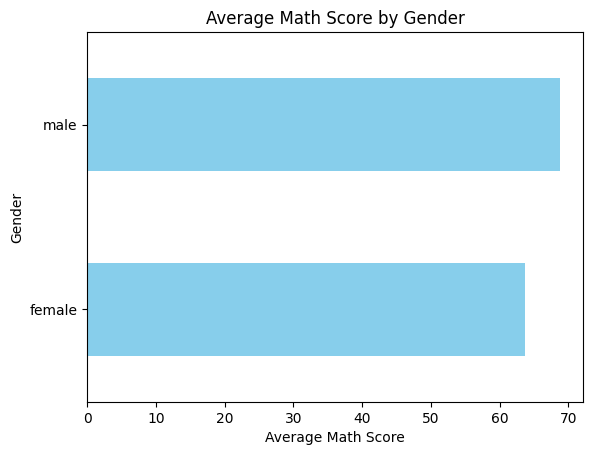

In [9]:
df.groupby("gender")["math score"].mean().plot.barh(color="skyblue")
plt.title("Average Math Score by Gender")
plt.xlabel("Average Math Score")
plt.ylabel("Gender")
plt.show()

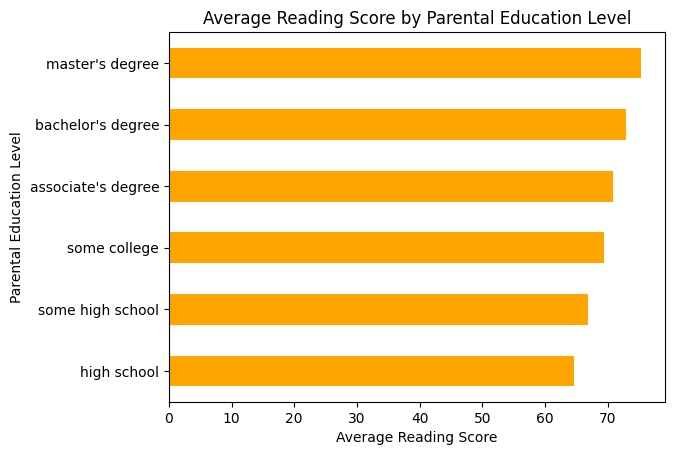

In [10]:
df.groupby("parental level of education")["reading score"].mean().sort_values().plot.barh(color="orange")
plt.title("Average Reading Score by Parental Education Level")
plt.xlabel("Average Reading Score")
plt.ylabel("Parental Education Level")
plt.show()

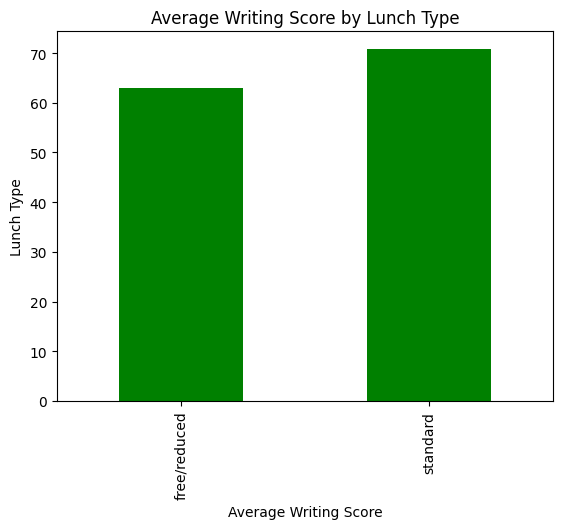

In [11]:
df.groupby("lunch")["writing score"].mean().plot.bar(color="green")
plt.title("Average Writing Score by Lunch Type")
plt.xlabel("Average Writing Score")
plt.ylabel("Lunch Type")
plt.show()

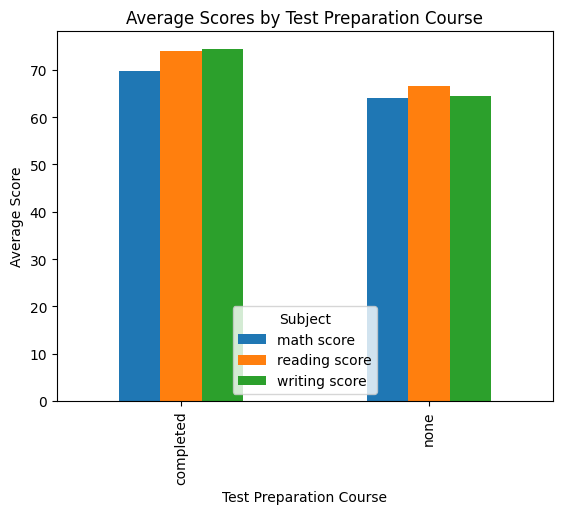

In [12]:
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().plot.bar()
plt.title("Average Scores by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.legend(title="Subject")
plt.show()

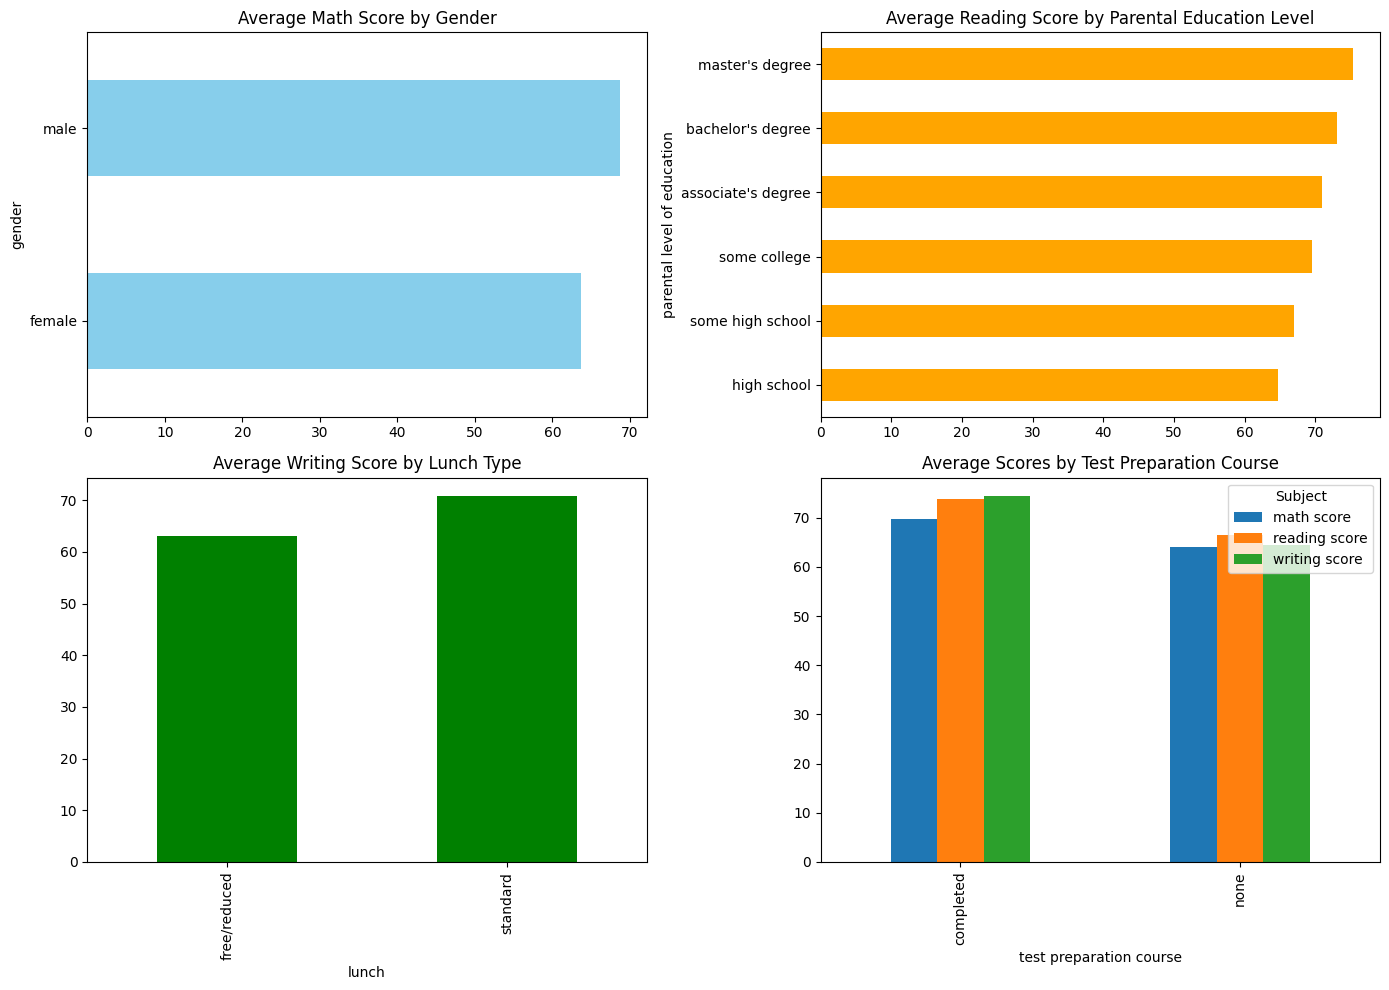

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("your_file.csv")

# Subplots مع جميع الرسومات
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# الرسم 1
df.groupby("gender")["math score"].mean().plot.barh(ax=axs[0,0], color="skyblue")
axs[0,0].set_title("Average Math Score by Gender")

# الرسم 2
df.groupby("parental level of education")["reading score"].mean().sort_values().plot.barh(ax=axs[0,1], color="orange")
axs[0,1].set_title("Average Reading Score by Parental Education Level")

# الرسم 3
df.groupby("lunch")["writing score"].mean().plot.bar(ax=axs[1,0], color="green")
axs[1,0].set_title("Average Writing Score by Lunch Type")

# الرسم 4
df.groupby("test preparation course")[["math score","reading score","writing score"]].mean().plot.bar(ax=axs[1,1])
axs[1,1].set_title("Average Scores by Test Preparation Course")
axs[1,1].legend(title="Subject")

plt.tight_layout()
plt.show()


In [17]:
df.groupby("parental level of education")["reading score"].mean().sort_values().plot.barh(ax=axs[0,1], color="orange")
axs[0,1].set_title("Average Reading Score by Parental Education Level")
axs[0,1].set_xlabel("Average Reading Score")
axs[0,1].set_ylabel("Parental Education Level")

Text(675.6875, 0.5, 'Parental Education Level')

In [18]:
df.groupby("lunch")["writing score"].mean().plot.bar(ax=axs[1,0], color="green")
axs[1,0].set_title("Average Writing Score by Lunch Type")
axs[1,0].set_xlabel("Average Writing Score")
axs[1,0].set_ylabel("Lunch Type")

Text(54.375, 0.5, 'Lunch Type')

In [19]:
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().plot.bar(ax=axs[1,1])
axs[1,1].set_title("Average Scores by Test Preparation Course")
axs[1,1].set_xlabel("Test Preparation Course")
axs[1,1].set_ylabel("Average Score")
axs[1,1].legend(title="Subject")

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>